<a href="https://colab.research.google.com/github/zariiiin/edgecourseproject/blob/main/Car_Number_Plate_Detection_Using_YOLO_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
achrafkhazri_yolo_weights_for_licence_plate_detector_path = kagglehub.dataset_download('achrafkhazri/yolo-weights-for-licence-plate-detector')
elysian01_car_number_plate_detection_path = kagglehub.dataset_download('elysian01/car-number-plate-detection')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
paths=[]
for dirname, _, filenames in os.walk('../input/car-number-plate-detection/Car_Number_Plate'):
    for filename in filenames:
        paths+=[os.path.join(dirname, filename)]

In [ ]:
n=len(paths)
N=6

In [ ]:
labels = open('../input/yolo-weights-for-licence-plate-detector/classes.names').read()
print(labels)

LP



In [ ]:
weights_path = '../input/yolo-weights-for-licence-plate-detector/lapi.weights'
configuration_path = '../input/yolo-weights-for-licence-plate-detector/darknet-yolov3.cfg'

probability_minimum = 0.4
threshold = 0.3

In [ ]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i[0]-1] for i in network.getUnconnectedOutLayers()]

# Put Rectngle around the Number Plate

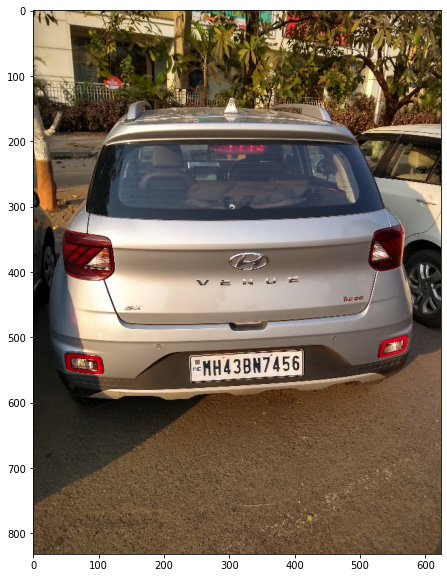

In [ ]:
image_input = cv2.imread(paths[N])
image_input = cv2.resize(image_input,dsize=None,fx=0.2,fy=0.2)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [ ]:
bounding_boxes = []
confidences = []
class_numbers = []
h,w = image_input.shape[:2]

for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

In [ ]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

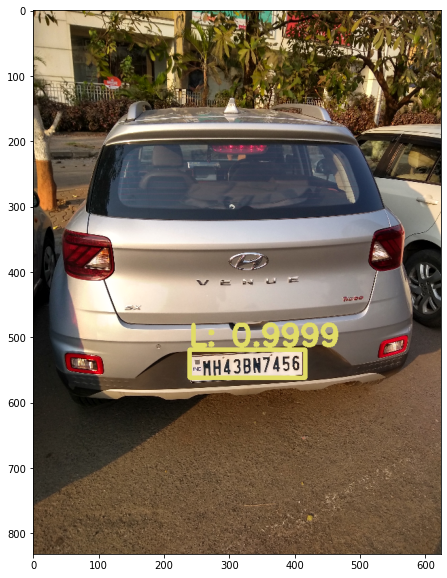

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()